# Step 1. Classify Feature Types
**Our survey data contains a total of 43 features**

### Type 1. Numerical Features (15) 
   - **Ratings from 1-5:** 
     - `ticket_purchase_ease`: Ease of ticket purchase rating
     - `arrival_experience`: Satisfaction with arriving experience
     - `attraction_wait_time`: Wait time at attractions
     - `express_pass_satisfaction`: Satisfaction with express pass 
     - `attraction_staff_service`: Service satisfaction at attractions
     - `attraction_overall_experience`: Overall experience at attractions
     - `merchandise_price_reasonable`: Reasonability of merchandise pricing
     - `merchandise_variety`: Variety of merchandise options
     - `food_variety`: Variety of food options
     - `food_quality`: Quality of food options
     - `food_price_reasonable`: Reasonability of food pricing
     - `overall_staff_service`: Overall staff service rating
     - `park_cleanliness`: Cleanliness rating of the park
     - `restroom_accessibility`: Accessibility of restrooms
     - `overall_satisfaction`: Overall satisfaction with the visit

### Type 2. Categorical Features (6) 
   - **Nominal (unordered)**:
     - `gender`, (`Female`, `Male`) --> **(1 or 0)**
     - `occupation`: (`Employed`; `Student`; `Retired`) 
     - `ticket_purchase_method`: (`Resort World Sentosa Website`, `Physically at the entrance`, `Third Party Vendor (e.g. Klook, Trip.com)`, `Others`)
     - `ticket_type`: (`One-day regular ticket`, `Regular ticket with Express Pass`, `VIP Experience`)
     - `visitor_type`: (`Solo`, `Family`, `Group`)
     - `entry_staff_service`:  Whether staff at the entrance were helpful and courteous (`Yes`, `No`, `Not Applicable`) 

### Type 3. Ordinal Features (7) 
   - **Ordered categorical features**: 
     - `age`: Age ranges (e.g., `< 18`, `18 - 25`, `26-35`, `36 - 45`, `46 - 55`, `> 55`)
     - `queue_time_at_entry`: Time in queue (`< 5 mins`, `5 - 10 mins`, `10 - 20 mins`, `> 20 mins`)
     - `merchandise_spend`: Spending range on merchandise (`NA`, `< $10`, `$10 - $20`, `$20 - $30`, `>$30`) 
     - `food_spend`: Spending range on food (`NA`, `< $10`, `$10 - $20`, `$20 - $30`, `>$30`) 
     - `food_wait_time`: Wait time at food outlets (`NA`, `< 5 mins`, `5 - 10 mins`, `> 10 mins`)
     - `return_likelihood`: Likelihood to return (`Yes`, `Maybe`, `No`)
     - `visit_issues_resolved`: Whether issues encountered were resolved satisfactorily (`Yes, issue resolved`; `Yes, issue not resolved`; `No issues`) 

### Type 4. Binary Features (7) 
   - **Binary variables**: 
     - `visitor_profile`: Type of visitor (Singaporean, Tourist)
     - `special_event_ticket`: Purchased for a special event (Yes, No)
     - `used_express_pass`: Used an express pass (Yes, No)
     - `shopping_purchase`: Whether the guest made purchases at shopping outlets (Yes, No)
     - `food_purchase`: Whether the guest purchased food (Yes, No)
     - `park_seating_availability`: Availability of park seating (Yes, No)
     - `recommendation_likelihood`: Likelihood of recommending the park to others (Yes, No)

### Type 5. Text Features (1) 
   - **Text data**:
     - `additional_comments`: Guest’s additional comments or suggestions

### Type 6. Temporal Features (2)
   - **Time-based variables**:
     - `visit_month`: Month of the visit (Jan - Mar, Apr - Jun, etc.)
     - `visit_day`: Day of the visit (Weekdays, Weekends, Holidays)
     
### Type 7. Multiple Response Questions (5) 
**These are categorical variables where guests could select multiple responses:**

   - `preferred_attractions`: (`Thrill Rides` `Special Events (e.g. Halloween Horror Nights)`, `Shows`, `Food and Shopping` `Kid-friendly`) --> get thrill rides lover vs family
   - `attractions_visited`: long list (max 21 options)
   - `disappointing_aspects`: (`Long wait times`, `Overcrowded attractions`, `Poor weather conditions`, `Limited dining options`, `Ride breakdowns`, `Unfriendly staff`, `lame rides`) 
   - `stores_visited`: long list (max 9 options)
   - `food_outlets_visited`: long list (max 15 options)


# Step 2. Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

real_survey_data = pd.read_csv('/Users/liyuan/DSA3101/Final Synthetic Data Generation/survey_data_cleaned.csv')

In [2]:
# Map original MRQ questions to shorter names
mrq_rename_mapping = {
    'what are your preferred attraction(s)? select all that apply.': 'preferred_attractions',
    'which attraction(s) did you visit? (select all that apply)\n* includes meet-and-greets, theatre shows etc.': 'attractions_visited',
    'which store(s) did you visit? (select all that apply)': 'stores_visited',
    'if your answer was "yes" above, which food outlet(s) did you visit? (select all that apply)': 'food_outlets_visited',
    'which aspect of your visit was the most disappointing? (select all that apply)': 'disappointing_aspects'
}

# Apply renaming
real_survey_data.rename(columns=mrq_rename_mapping, inplace=True)

print(real_survey_data.columns)

Index(['age', 'gender', 'occupation', 'visitor_profile',
       'ticket_purchase_method', 'ticket_type', 'special_event_ticket',
       'ticket_purchase_ease', 'visitor_type', 'preferred_attractions',
       'visit_month', 'visit_day', 'arrival_experience', 'queue_time_at_entry',
       'entry_staff_service', 'attractions_visited', 'attraction_wait_time',
       'used_express_pass', 'express_pass_satisfaction',
       'attraction_staff_service', 'attraction_overall_experience',
       'shopping_purchase', 'stores_visited', 'merchandise_spend',
       'merchandise_price_reasonable', 'merchandise_variety', 'food_purchase',
       'food_outlets_visited', 'food_variety', 'food_quality',
       'food_price_reasonable', 'food_spend', 'food_wait_time',
       'visit_issues_resolved', 'overall_staff_service', 'park_cleanliness',
       'park_seating_availability', 'restroom_accessibility',
       'overall_satisfaction', 'disappointing_aspects', 'return_likelihood',
       'recommendation_likel

### Type 1. Numeric Feautures

### Key Insights 

1. **Overall High Satisfaction in Key Areas**:
   - Features like `ticket_purchase_ease`, `attraction_staff_service`, `attraction_overall_experience`, `overall_staff_service`, and `overall_satisfaction` generally show high ratings, with most responses clustering around 4 and 5.
   - This suggests that most guests have positive experiences in these areas, contributing to strong overall satisfaction.

2. **Mixed Ratings for Attraction and Food Aspects**:
   - Features such as `attraction_wait_time`, `food_variety`, and `food_quality` exhibit a more balanced distribution of ratings, indicating variability in guest experiences.
   - This mix of ratings suggests that some guests are satisfied while others are less so, highlighting these as areas for potential improvement to provide a more consistent experience.

3. **Pricing as a Notable Pain Point**:
   - `merchandise_price_reasonable` and `food_price_reasonable` have lower average ratings (around 2-3) and moderate correlation with each other, suggesting that guests may feel these areas do not offer good value.
   - This could identify a price-sensitive segment where guests perceive costs as less reasonable, impacting their overall satisfaction.

4. **Key Drivers of Overall Satisfaction**:
   - Strong correlations between `overall_satisfaction` and features such as `arrival_experience` (0.75), `overall_staff_service` (0.77), and `park_cleanliness` (0.76) suggest that these aspects are primary drivers of guest satisfaction.
   - Focusing on these areas could yield improvements in overall guest satisfaction, as they play a significant role in shaping the guest experience.

5. **Express Pass and Price Sensitivity**:
   - `express_pass_satisfaction` has a negative correlation with `ticket_purchase_ease` (-0.49) and `food_price_reasonable` (-0.65), possibly indicating that guests less satisfied with ticket purchases or food pricing may not see value in the express pass.
   - This could suggest a segment of price-sensitive guests who are less inclined to pay extra for add-ons like the express pass.

In [5]:
# Summary statistics for numerical features
numerical_features = [
    'ticket_purchase_ease', 'arrival_experience', 'attraction_wait_time',
    'express_pass_satisfaction', 'attraction_staff_service', 'attraction_overall_experience',
    'merchandise_price_reasonable', 'merchandise_variety', 'food_variety',
    'food_quality', 'food_price_reasonable', 'overall_staff_service',
    'park_cleanliness', 'restroom_accessibility', 'overall_satisfaction'
]

print(real_survey_data[numerical_features].describe())

       ticket_purchase_ease  arrival_experience  attraction_wait_time  \
count             69.000000           69.000000             69.000000   
mean               4.057971            3.753623              2.811594   
std                1.148964            1.048890              1.074783   
min                1.000000            1.000000              1.000000   
25%                4.000000            3.000000              2.000000   
50%                4.000000            4.000000              3.000000   
75%                5.000000            4.000000              3.000000   
max                5.000000            5.000000              5.000000   

       express_pass_satisfaction  attraction_staff_service  \
count                   4.000000                 69.000000   
mean                    2.750000                  3.811594   
std                     1.258306                  0.809418   
min                     1.000000                  1.000000   
25%                     2.500000

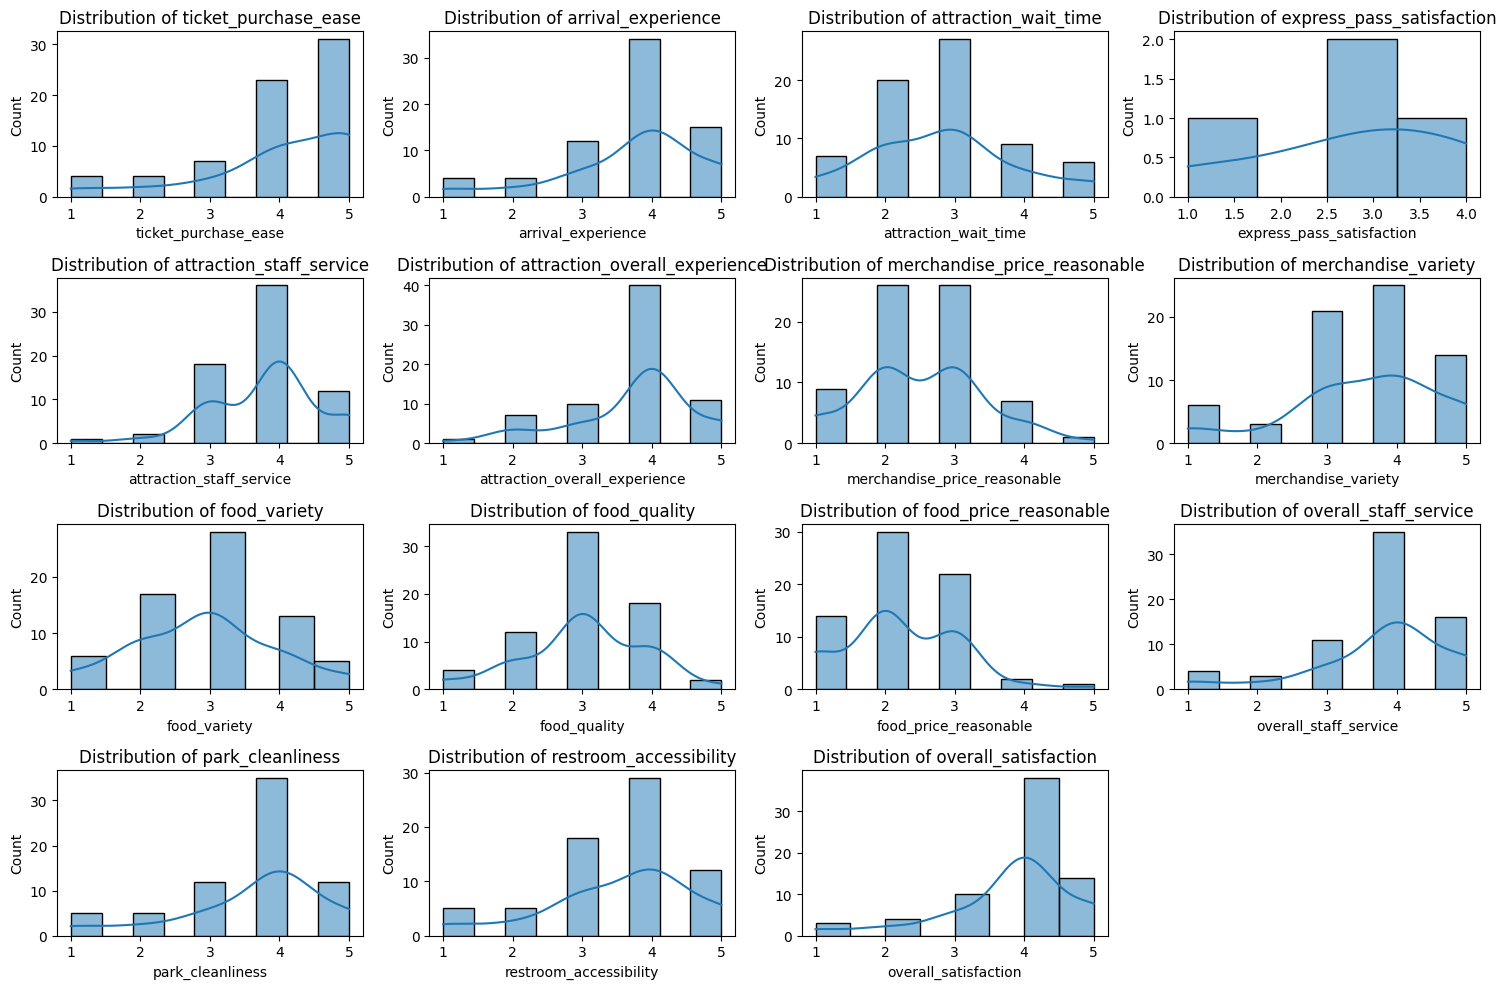

In [6]:
# Plot histograms for each numerical feature to understand distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(real_survey_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

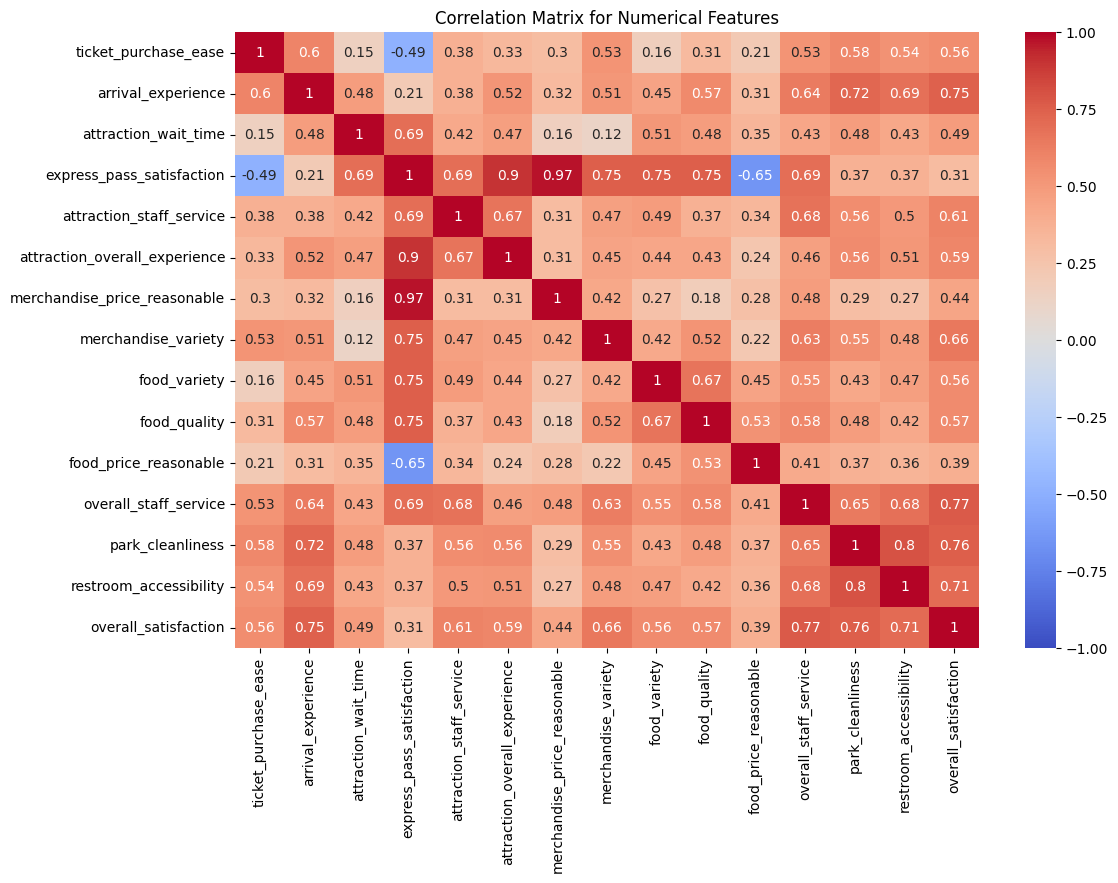

Correlation with 'overall_satisfaction':

overall_satisfaction             1.000000
overall_staff_service            0.767905
park_cleanliness                 0.755754
arrival_experience               0.745367
restroom_accessibility           0.707194
attraction_overall_experience    0.590987
attraction_wait_time             0.485212
Name: overall_satisfaction, dtype: float64


In [7]:
# Analyze correlations among numerical features to see relationships
plt.figure(figsize=(12, 8))
sns.heatmap(real_survey_data[numerical_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

# Define the columns of interest
columns_of_interest = [
    'overall_satisfaction', 
    'overall_staff_service', 
    'park_cleanliness', 
    'restroom_accessibility', 
    'attraction_wait_time',
    'attraction_overall_experience',
    'arrival_experience'
]

# Calculate the correlation matrix for the columns of interest
correlation_matrix = real_survey_data[columns_of_interest].corr()

print("Correlation with 'overall_satisfaction':\n")
print(correlation_matrix['overall_satisfaction'].sort_values(ascending=False))

### Type 2. Categorical Features 

### Key Insights 
1. **Ticket Type**:
   - **Insight**: Most guests hold regular tickets, with minimal use of express passes or VIP experiences.
   - **Implication**: This distribution suggests an opportunity to investigate the distinct experiences and satisfaction of express pass and VIP ticket holders. Segmenting by ticket type could reveal if these guests have unique expectations or pain points, offering insights into how to enhance or better promote premium options.

2. **Visitor Type**:
   - **Insight**: A majority of visitors come in groups, with fewer solo or family visitors.
   - **Implication**: This pattern highlights the park’s appeal to social groups, presenting a clear segmentation area. Analyzing group versus solo or family visitors may reveal different needs and satisfaction drivers, allowing for tailored offerings. For instance, groups may prioritize attractions that cater to shared experiences, while solo visitors may value efficient navigation and shorter wait times.

3. **Visit Issues Resolution**:
   - **Insight**: Most guests report no issues, but some who encounter issues do not have them resolved.
   - **Implication**: Issue resolution could be a key driver of satisfaction and loyalty. Focusing on this segment may uncover how resolving issues impacts return likelihood and guest recommendations. This insight can guide targeted improvements in customer service protocols, especially for guests who encounter problems.

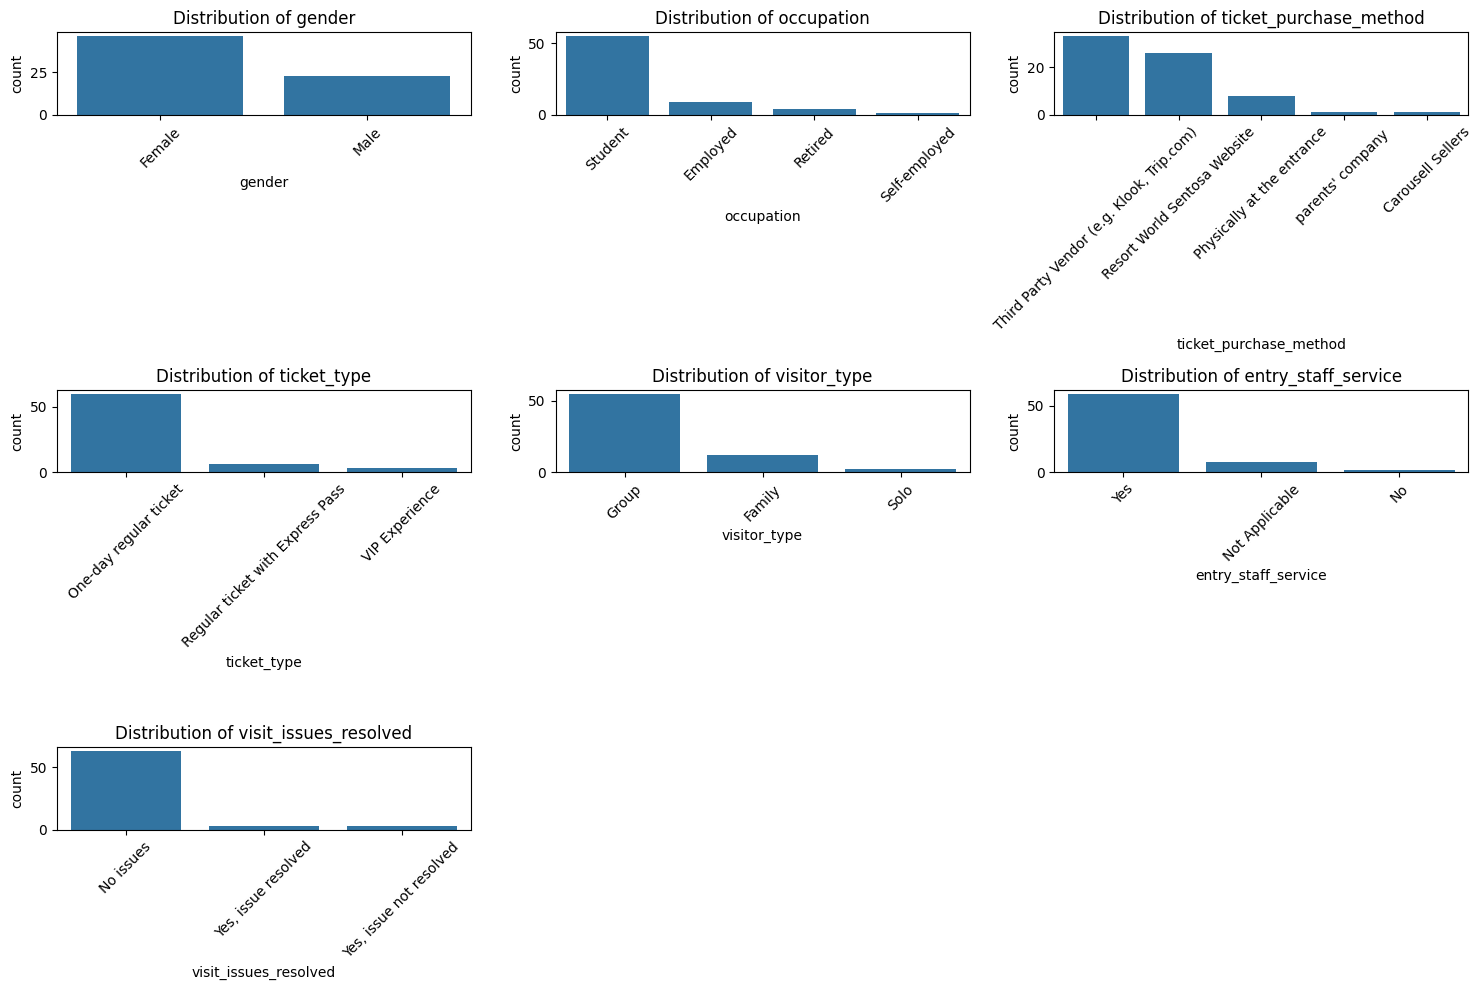

In [5]:
# Categorical Features - Distribution Plots
categorical_features = [
    'gender', 'occupation', 'ticket_purchase_method', 'ticket_type',
    'visitor_type', 'entry_staff_service', 'visit_issues_resolved'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=real_survey_data[col], order=real_survey_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The boxplots shows that **gender**, **occupation**, **ticket purchase method**, **ticket type**, **visitor type**, and **entry staff service** each exhibit distinct patterns in guest satisfaction across categories. These boxplots highlight variations in satisfaction levels based on each feature, indicating differences in experiences and expectations. Retaining these features in the model will improve segmentation by capturing diverse guest satisfaction profiles informed by these categorical variables.

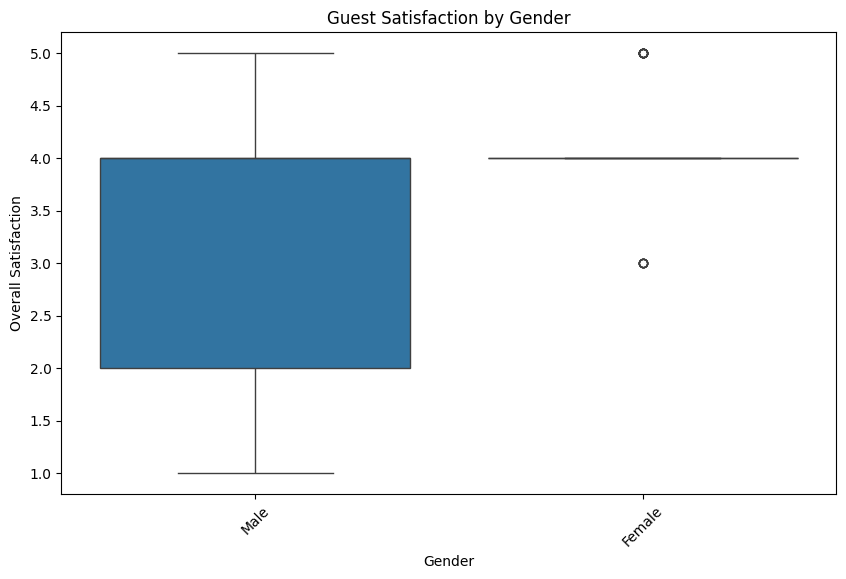

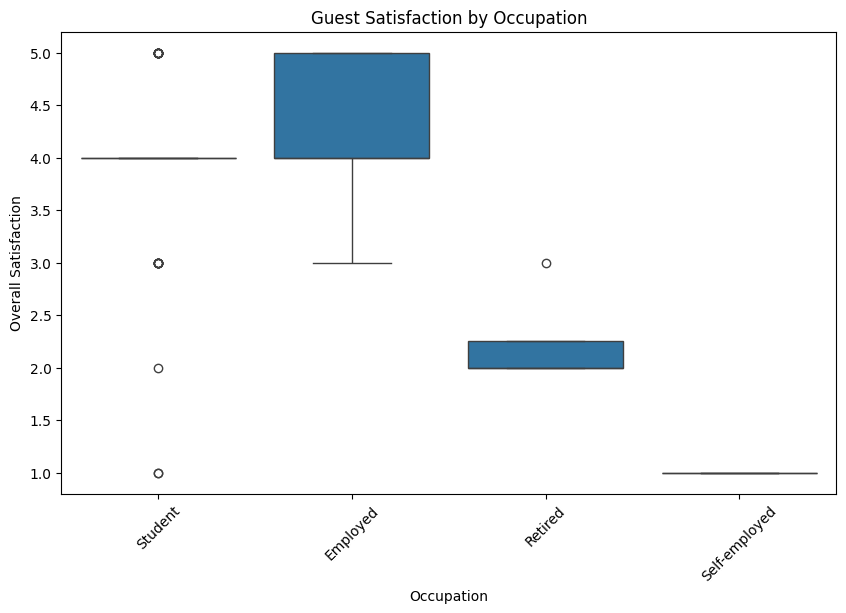

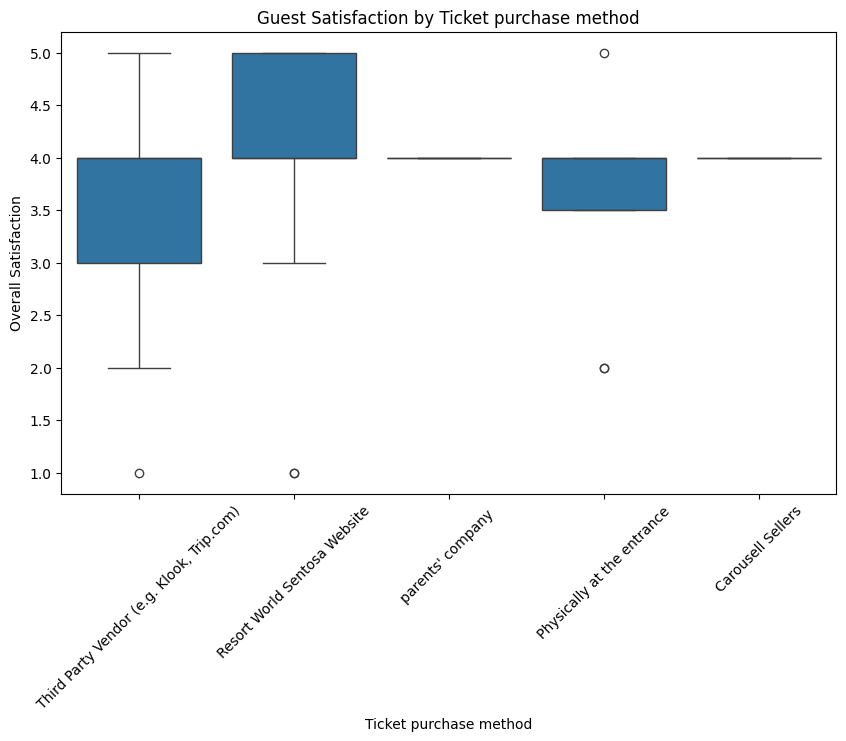

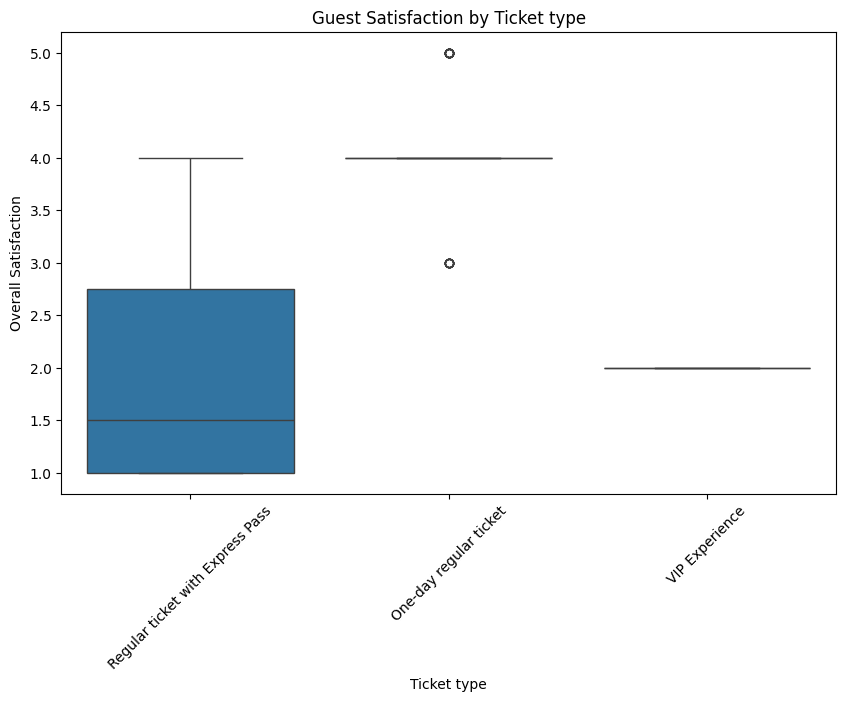

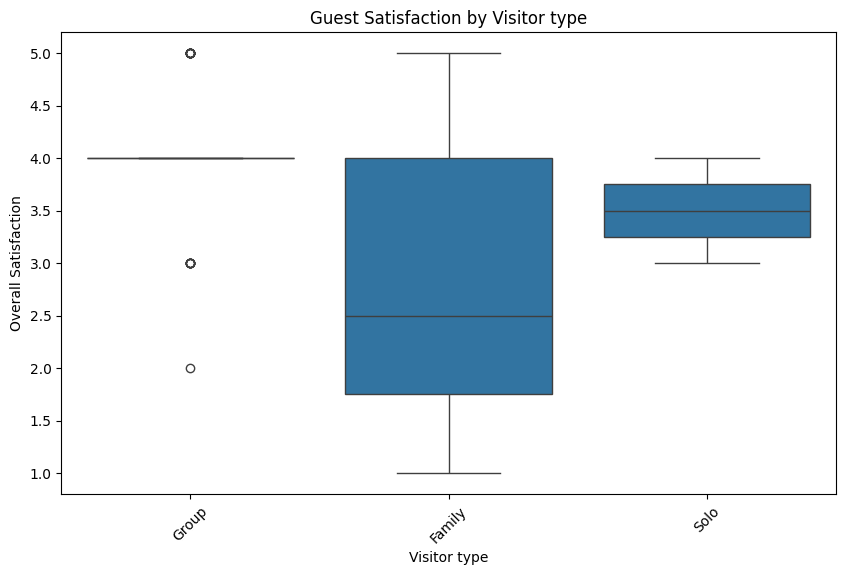

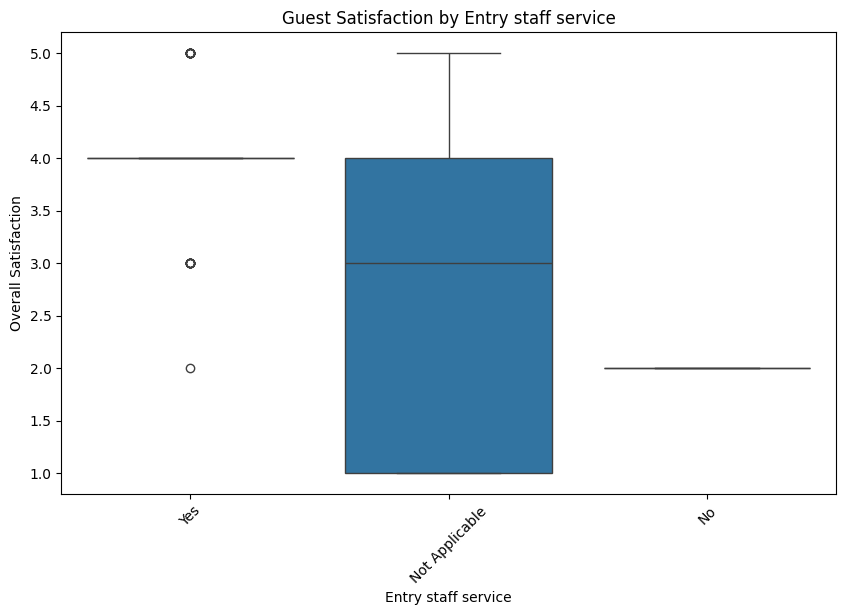

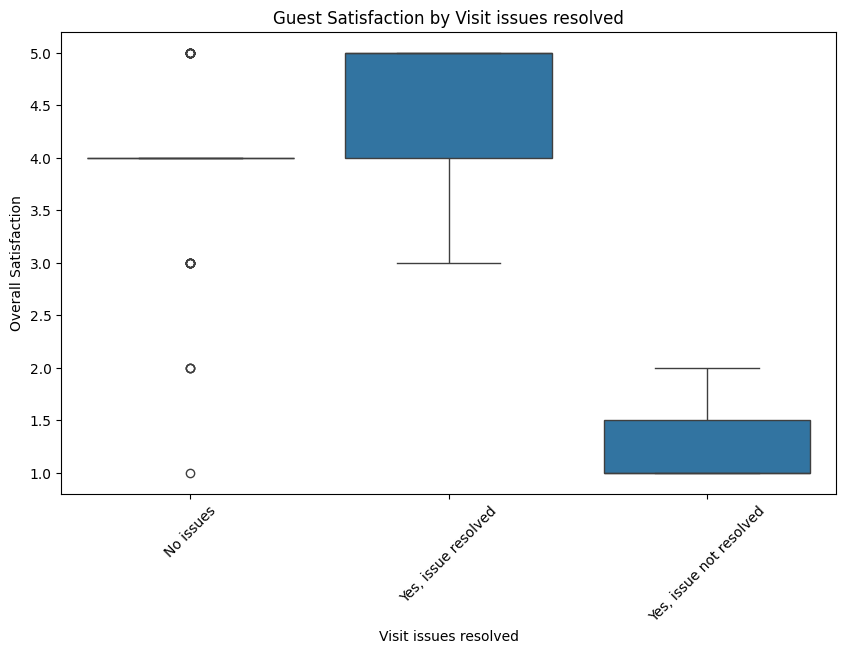

In [6]:
# Plot overall satisfaction by each categorical variable
for var in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='overall_satisfaction', data=real_survey_data)
    plt.title(f"Guest Satisfaction by {var.replace('_', ' ').capitalize()}")
    plt.xlabel(var.replace('_', ' ').capitalize())
    plt.ylabel("Overall Satisfaction")
    plt.xticks(rotation=45)
    plt.show()

### Type 3. Ordinal Features

### Key Insights 

1. **Age**:
   - **Insight**: The majority of guests are in the 18-25 age range.
   - **Implication**: This predominantly young demographic may have distinct preferences or spending patterns. Analyzing satisfaction and spending trends specifically within this age group could reveal valuable insights for targeted offerings.

2. **Merchandise Spend**:
   - **Insight**: The most common spending range on merchandise is $20-30, suggesting a pricing "sweet spot."
   - **Implication**: Segmenting by merchandise spend is valuable to identify high-value customers. Targeted promotions or exclusive product offerings could enhance satisfaction and revenue within this segment.

3. **Food Wait Time**:
   - **Insight**: Most guests report food wait times of 5-10 minutes, but there is a subset experiencing longer waits.
   - **Implication**: Analyzing the impact of longer food wait times on satisfaction could reveal operational improvement areas. Addressing extended wait times for this group could help enhance the overall guest experience.

4. **Return Likelihood**:
   - **Insight**: Many guests indicate they would return, though some say "Maybe" or "No."
   - **Implication**: Return likelihood is a valuable segmentation variable to identify guests with high loyalty versus those hesitant to return. 

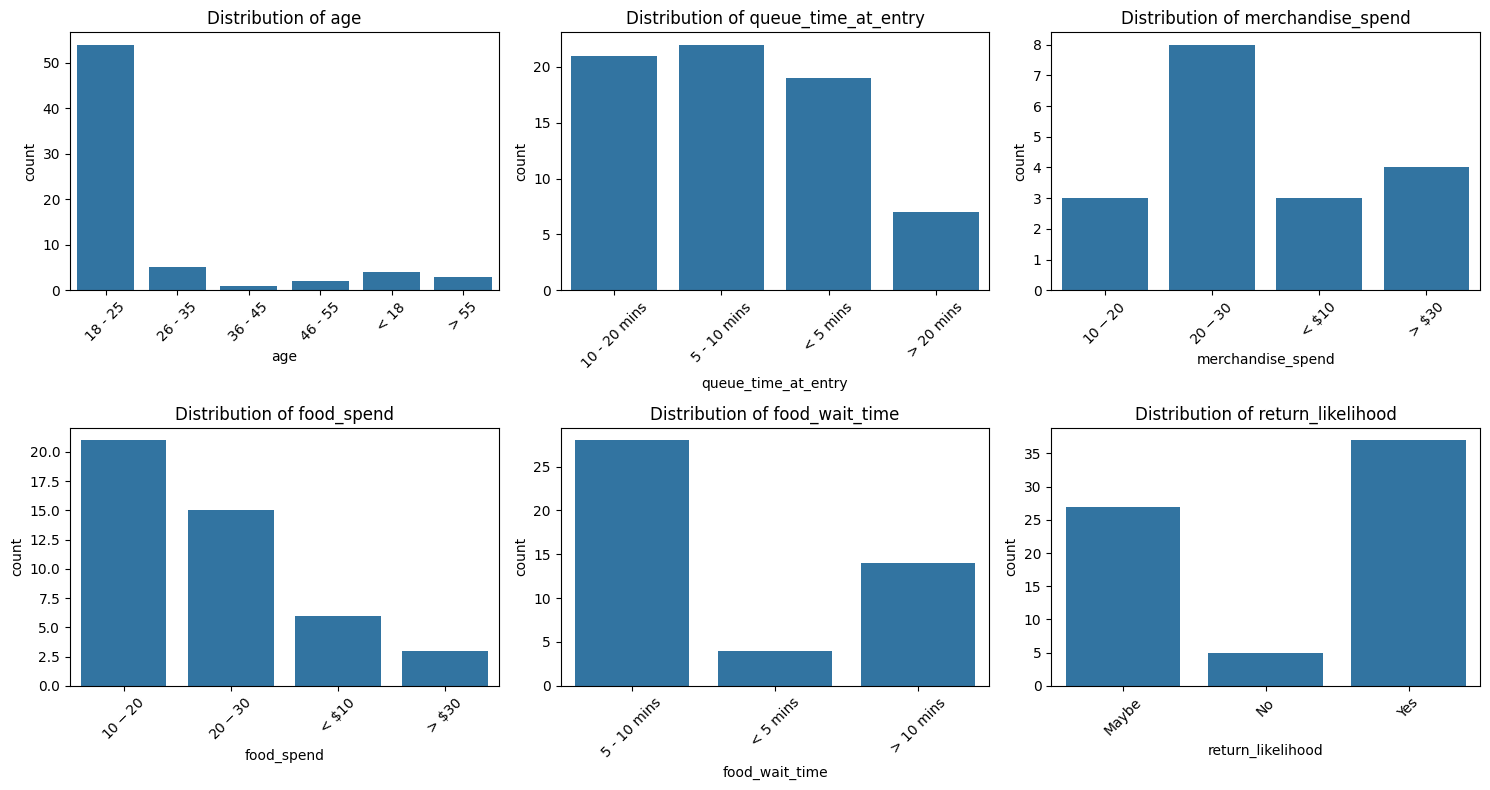

In [10]:
# Ordinal Features Analysis
ordinal_features = [
    'age', 'queue_time_at_entry', 'merchandise_spend',
    'food_spend', 'food_wait_time', 'return_likelihood'
]

# Plot the distribution of ordinal features with mixed data type handling
plt.figure(figsize=(15, 8))
for i, col in enumerate(ordinal_features, 1):
    plt.subplot(2, 3, i)
    # Convert all entries to string for sorting and visualization
    sns.countplot(x=real_survey_data[col].astype(str), order=sorted(real_survey_data[col].dropna().unique().astype(str)))
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Type 4. Binary Features

### Key Insights 

1. **Visitor Profile (Singaporean vs. Tourist)**:
   - **Insight**: The majority of respondents are Singaporean, with a small proportion of tourists.
   - **Implication**: Although limited data from tourists may not allow for deep segmentation, analyzing satisfaction differences between these groups could highlight areas for enhancing the experience for tourists, who may have distinct expectations.

2. **Special Event Ticket**:
   - **Insight**: There is a fairly even split between guests attending for a special event and those with regular tickets.
   - **Implication**: Segmenting by special event attendance could reveal if event guests have different satisfaction drivers or spending behaviors, providing insights for future event planning and promotions.

3. **Express Pass Usage**:
   - **Insight**: Very few guests used the express pass.
   - **Implication**: Given the limited usage, focus on understanding why guests might be reluctant to purchase an express pass. Gathering feedback could help refine or promote this feature more effectively.

4. **Shopping and Food Purchases**:
   - **Insight**: A smaller proportion of guests made shopping or food purchases.
   - **Implication**: Segmenting by purchase behavior could identify high-value guests who contribute to non-ticket revenue. Understanding what drives these purchases could help enhance merchandising and food offerings.

5. **Recommendation Likelihood**:
   - **Insight**: Most guests would recommend the park, but a portion would not.
   - **Implication**: Analyzing factors influencing recommendation likelihood can help pinpoint areas for improvement to increase positive word-of-mouth, especially among those less likely to recommend the park.

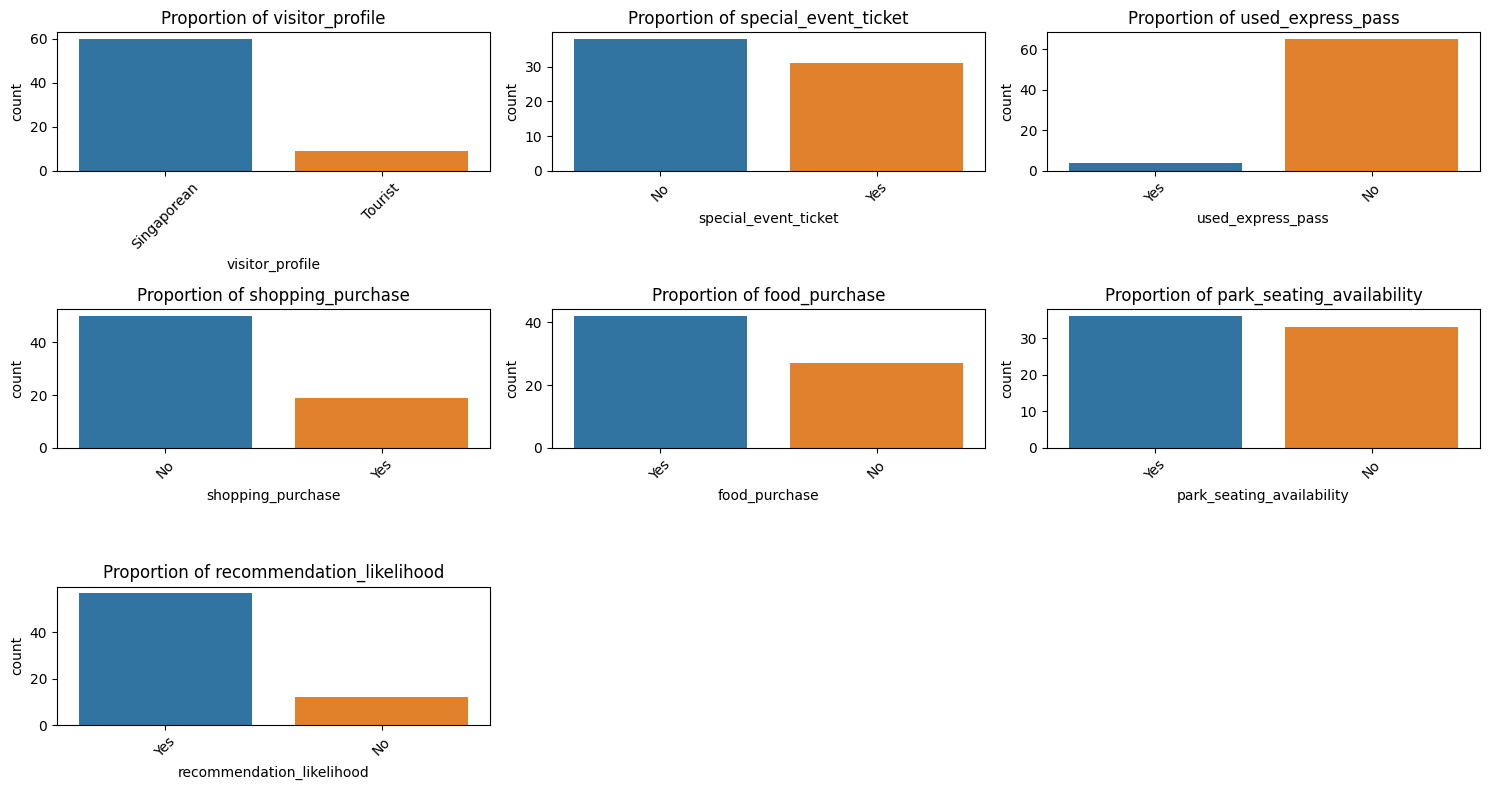

In [14]:
# Binary Features Analysis
binary_features = [
    'visitor_profile', 'special_event_ticket', 'used_express_pass',
    'shopping_purchase', 'food_purchase', 'park_seating_availability', 
    'recommendation_likelihood'
]

# Plot the proportion of each binary feature without specifying the palette
plt.figure(figsize=(15, 8))
for i, col in enumerate(binary_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=real_survey_data[col], hue=real_survey_data[col], legend=False)
    plt.title(f'Proportion of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Type 5. Temporal Features

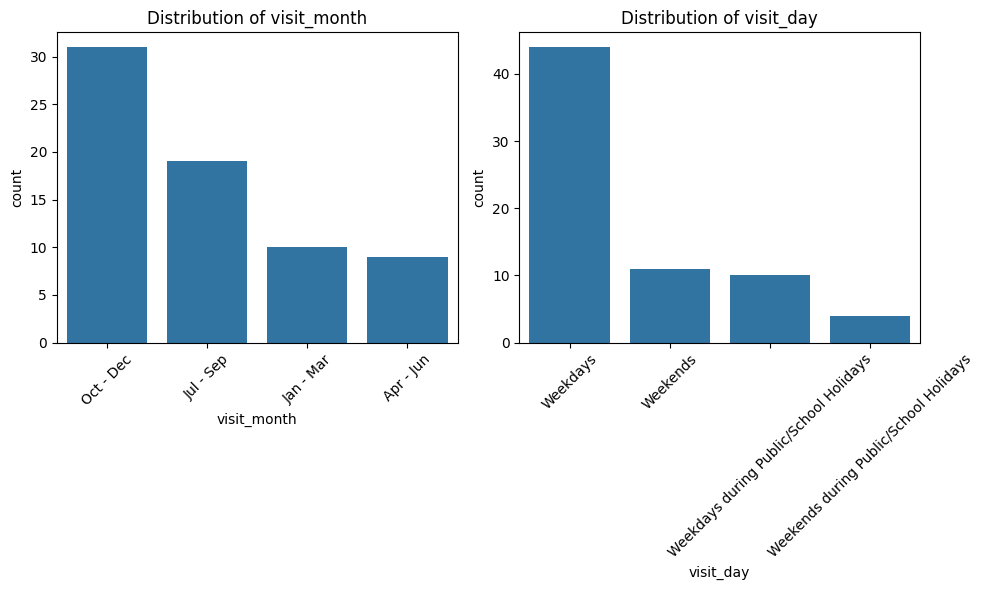

In [16]:
# Temporal Features Analysis
temporal_features = ['visit_month', 'visit_day']

# Plot distributions for temporal features
plt.figure(figsize=(10, 6))
for i, col in enumerate(temporal_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=real_survey_data[col], order=real_survey_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Type 7. Multiple Response Questions 

### Key Insights 

1. **Preferred Attractions**:
   - **Insight**: Thrill rides are the most preferred attractions, followed by special events (e.g., Halloween Horror Nights), shows, and food and shopping options.
   - **Implication**: This preference for thrill rides and special events suggests that high-adrenaline experiences are a major draw for guests. Focusing on maintaining and enhancing thrill attractions or promoting seasonal events could help meet guest expectations and drive higher engagement.

2. **Disappointing Aspects of the Visit**:
   - **Insight**: Long wait times and overcrowded attractions are the top disappointing factors, followed by poor weather and limited dining options.
   - **Implication**: Addressing operational issues related to wait times and crowd management could significantly improve guest satisfaction. Consider strategies like virtual queueing, capacity management, and optimizing popular attraction flows to alleviate these pain points.

3. **Stores Visited**:
   - **Insight**: The most-visited stores include the Universal Studios Store, Minion Mart, and Fairy Godmother’s Potion Shop.
   - **Implication**: These stores could be key drivers of retail revenue. Analyzing purchasing patterns within these stores could help tailor merchandise or improve layout/design to enhance the shopping experience.

4. **Food Outlets Visited**:
   - **Insight**: The most popular food outlets include Mel’s Drive-In, Starbucks, and Loui’s NY Pizza Parlour.
   - **Implication**: These popular outlets may have high foot traffic, potentially leading to longer wait times. Assessing peak times and considering options like express lanes or mobile ordering could improve the dining experience at these locations.

5. **Attractions Visited**:
   - **Insight**: Popular attractions include "Revenge of the Mummy," "Transformers: The Ultimate 3D Battle," and "Jurassic Park Rapid Adventure."
   - **Implication**: These attractions are major crowd pullers, so monitoring guest flow and wait times here can help manage crowd distribution and optimize guest satisfaction.

In [3]:
def analyze_select_all(data, question):
    responses = data[question].dropna().apply(str)
    
    all_options = [option.strip() for response in responses for option in response.split(',')]
    option_counts = Counter(all_options)
    print(option_counts)
    
    # Plot the word count graph
    options, counts = zip(*option_counts.most_common()) 
    plt.barh(options, counts, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel("Aspects")
    plt.gca().invert_yaxis() 
    plt.grid(False)
    plt.gca().spines["top"].set_visible(False)  
    plt.gca().spines["right"].set_visible(False)  
    plt.gca().spines["left"].set_visible(False)
    plt.show()

Counter({'Thrill Rides': 56, 'Special Events (e.g. Halloween Horror Nights)': 37, 'Shows': 25, 'Food and Shopping': 21, 'Kid-friendly': 20})


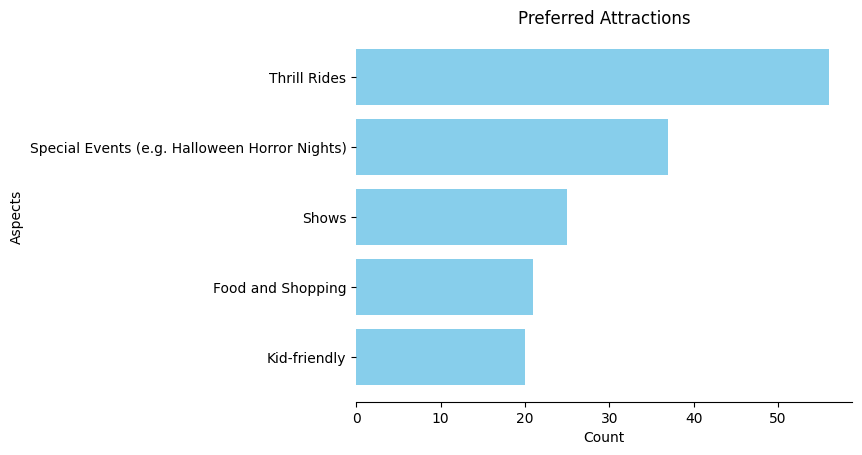

Counter({'Long wait times': 49, 'Overcrowded attractions': 44, 'Poor weather conditions': 20, 'Limited dining options': 16, 'Ride breakdowns': 8, 'Unfriendly staff': 4, 'lame rides': 1})


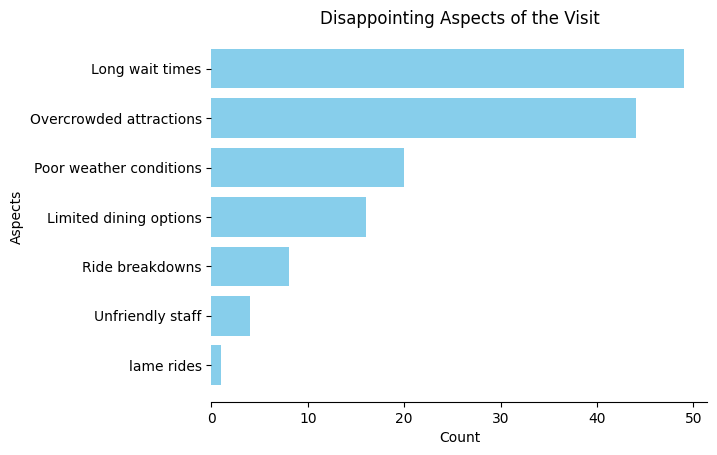

Counter({'[Hollywood] Universal Studios Store': 16, '[Hollywood] Minion Mart': 14, "[Far Far Away] Fairy Godmother's Potion Shop": 9, '[The Lost World] The Dino-Store': 5, '[Hollywood] Candylicious': 5, 'NA': 4, '[Hollywood] Hello Kitty Studio Store': 3, '[Sci-Fi City] Transformers Supply Vault': 3, "[New York] Big Bird's Emporium": 2, '[Hollywood] The Dark Room': 1})


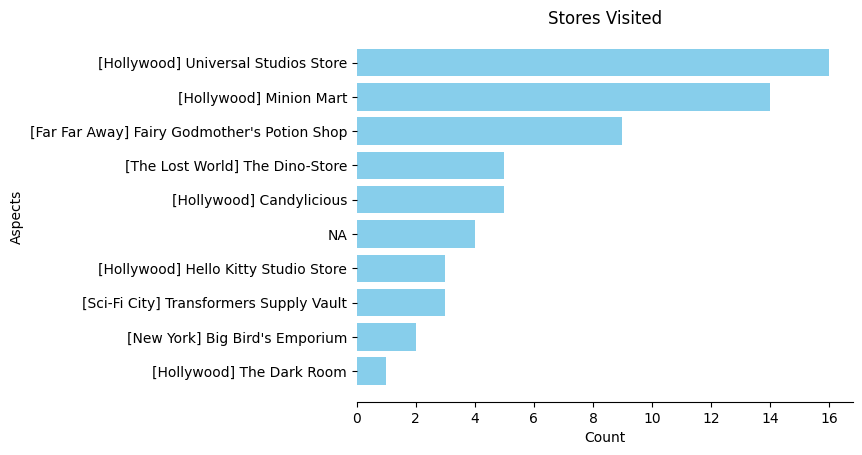

Counter({"[Hollywood] Mel's Drive-In": 14, '[Hollywood] Starbucks': 13, "[New York] Loui's NY Pizza Parlour™": 8, '[Sci-Fi City] Frozen Fuel': 7, '[The Lost World] Discovery Food Court': 6, '[Sci-Fi City] Star Dots': 5, '[The Lost World] Jungle Bites': 4, '[The Lost World] Fossil Fuels': 4, '[Sci-Fi City] Starbot Cafe': 2, '[Far Far Away] Goldilocks': 2, '[Sci-Fi City] Planet Yen': 1, '[Ancient Egypt] Cairo Market': 1, "[Far Far Away] Frair's Good Food": 1, '[Ancient Egypt] Oasis Spice Cafe': 1, '[New York] Me Want Cookie!': 1})


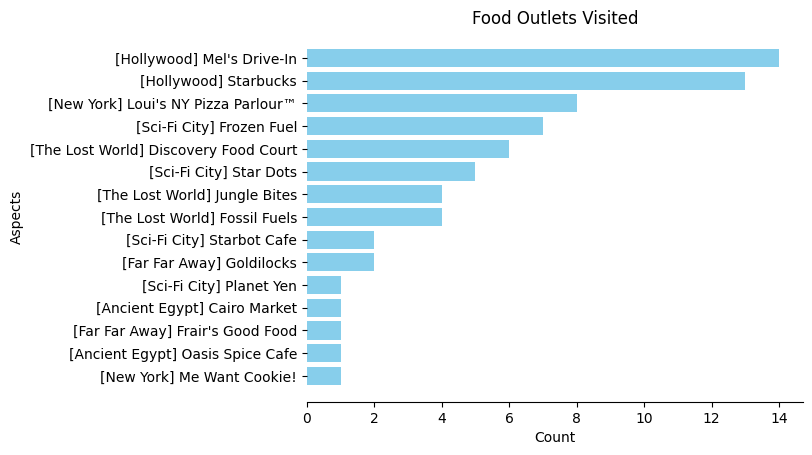

Counter({'[Ancient Egypt] Revenge of the Mummy': 56, '[Sci-Fi City] TRANSFORMERS The Ride: The Ultimate 3D Battle': 47, '[The Lost World] Jurassic Park Rapid Adventure': 47, '[Sci-Fi City] Battlestar Galatica: HUMAN vs CYLON': 44, '[Far Far Away] Enchanted Airways': 38, '[The Lost World] Canopy Flyer': 37, '[New York] Sesame Street Spaghetti Chase': 33, "[Far Far Away] Puss In Boots' Giant Journey": 32, '[Far Far Away] Shrek 4-D Adventure': 29, '[New York] Lights': 23, 'Camera': 23, 'Action!': 23, '[Sci-Fi City] Accelerator': 22, '[Sci-Fi City] TRANSFORMERS: Voices of Cybertron': 21, '[The Lost World] Dino-Soarin': 20, '[Far Far Away] Happily Ever After': 19, '[The Lost World] WaterWorld': 17, '[Ancient Egypt] Treasure Hunters': 17, '[Far Far Away] Magic Potion Spin': 10, '[Far Far Away] Donkey Live': 8, '[Hollywood] Trolls Hug Time Jubilee': 7, '[Sci-Fi City] Sci-Fi Games': 6, '[The Lost World] Raptor Encounter with Blue': 5})


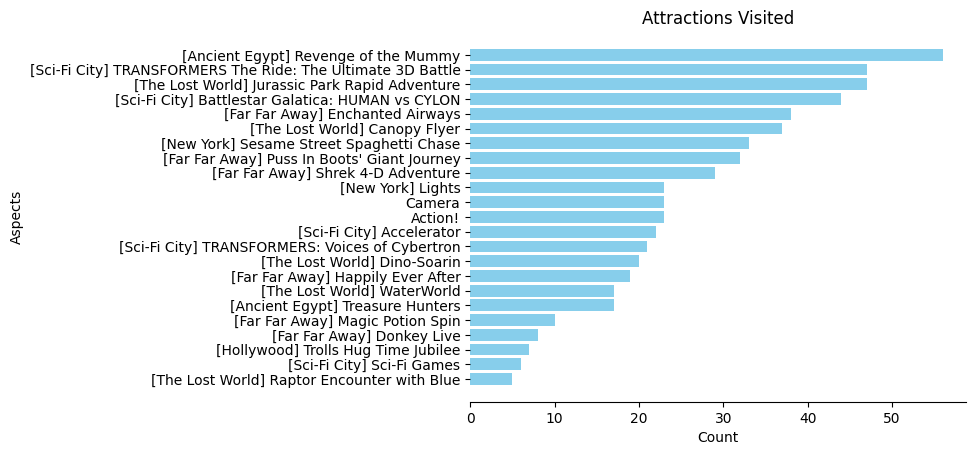

In [4]:
plt.title("Preferred Attractions")
analyze_select_all(real_survey_data, 'preferred_attractions')

plt.title("Disappointing Aspects of the Visit")
analyze_select_all(real_survey_data, 'disappointing_aspects')

plt.title("Stores Visited")
analyze_select_all(real_survey_data, 'stores_visited')

plt.title("Food Outlets Visited")
analyze_select_all(real_survey_data, 'food_outlets_visited')

plt.title("Attractions Visited")
analyze_select_all(real_survey_data, 'attractions_visited')

### Interpretation of Average Satisfaction by `preferred_attractions`

1. **Thrill Rides**
   - **Higher Satisfaction**: Guests who preferred thrill rides have a higher average satisfaction (0.741) compared to those who didn't (0.538).
   - **Insight**: Preference for thrill rides is associated with increased satisfaction, suggesting these experiences positively impact overall enjoyment.

2. **Special Events**
   - **Moderate Increase**: Guests who preferred special events show a slightly higher average satisfaction (0.723) than those who didn’t (0.680).
   - **Insight**: Preference for special events has a mild positive effect on satisfaction, though the impact is less pronounced than thrill rides.

3. **Shows**
   - **Lower Satisfaction**: Guests who preferred shows have slightly lower satisfaction (0.680) compared to those who did not (0.716).
   - **Insight**: Preference for shows may correlate with lower satisfaction, possibly indicating unmet expectations related to show quality or accessibility.

4. **Food and Shopping**
   - **Lower Satisfaction**: Guests who prioritized food and shopping report lower satisfaction (0.619) compared to those who didn’t (0.740).
   - **Insight**: A focus on food and shopping correlates with lower satisfaction, potentially pointing to areas for improvement in dining or retail experiences.

5. **Kid-Friendly Attractions**
   - **Lower Satisfaction**: Guests who prioritized kid-friendly attractions show lower average satisfaction (0.650) compared to others (0.724).
   - **Insight**: Guests seeking kid-friendly options may face limitations, suggesting potential improvements in family-oriented experiences.

### Summary
Preferences for **thrill rides** and **special events** are linked to higher satisfaction, while a focus on **shows**, **food/shopping**, and **kid-friendly attractions** appears associated with lower satisfaction. This may highlight areas for enhancing guest experiences in these categories.


Average Satisfaction for Thrill Rides:
Selected: 3.9643
Not Selected: 3.1538




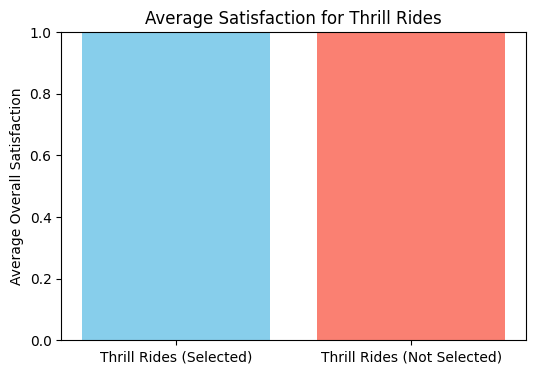

Average Satisfaction for Special Events:
Selected: 3.8919
Not Selected: 3.7188




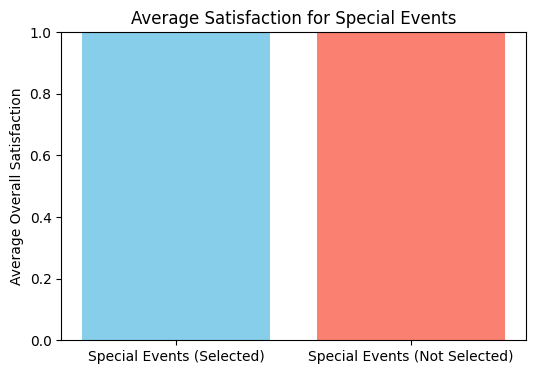

Average Satisfaction for Shows:
Selected: 3.7200
Not Selected: 3.8636




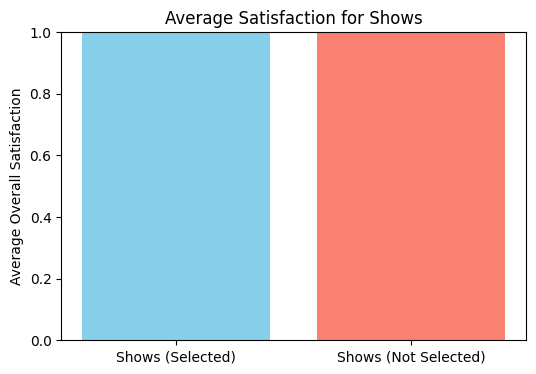

Average Satisfaction for Food and Shopping:
Selected: 3.4762
Not Selected: 3.9583




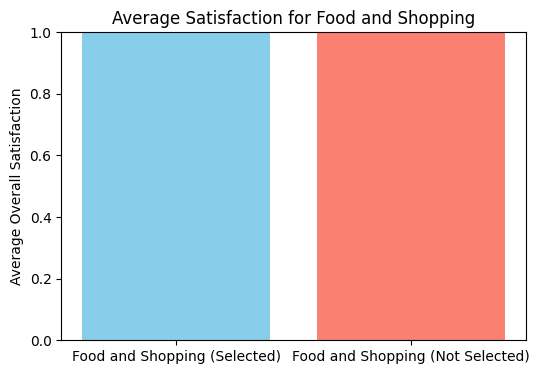

Average Satisfaction for Kid-friendly:
Selected: 3.6000
Not Selected: 3.8980




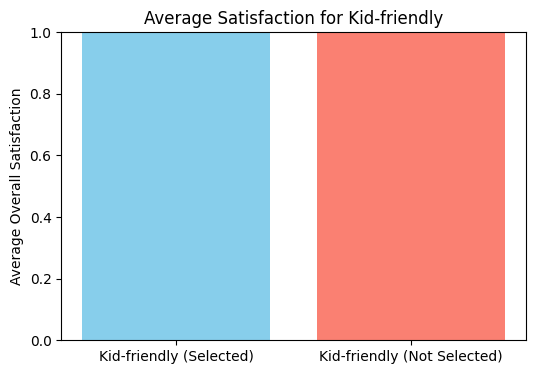

In [5]:
# Define preferred attraction options
preferred_options = ["Thrill Rides", "Special Events", "Shows", "Food and Shopping", "Kid-friendly"]

# Loop through each option, calculate average satisfaction, store output and plot
for option in preferred_options:
    # Filter data to check if the option is in the preferred attractions column
    selected = real_survey_data[real_survey_data['preferred_attractions'].apply(lambda x: option in x)]
    not_selected = real_survey_data[real_survey_data['preferred_attractions'].apply(lambda x: option not in x)]

    # Calculate average satisfaction for selected and not selected groups
    avg_satisfaction_selected = selected['overall_satisfaction'].mean()
    avg_satisfaction_not_selected = not_selected['overall_satisfaction'].mean()
    
    # Print numerical output
    print(f"Average Satisfaction for {option}:")
    print(f"Selected: {avg_satisfaction_selected:.4f}")
    print(f"Not Selected: {avg_satisfaction_not_selected:.4f}")
    print("\n")
    
    # Plot the results
    plt.figure(figsize=(6, 4))
    plt.bar([f"{option} (Selected)", f"{option} (Not Selected)"],
            [avg_satisfaction_selected, avg_satisfaction_not_selected],
            color=['skyblue', 'salmon'])
    plt.ylim(0, 1)
    plt.ylabel("Average Overall Satisfaction")
    plt.title(f"Average Satisfaction for {option}")
    plt.show()